In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [ ]:
# for uploading the csv files
from google.colab import files
uploaded_1= files.upload()

# browse and upload local csv files

Saving plot2-IoT Sensor Data.csv to plot2-IoT Sensor Data (1).csv


In [ ]:
uploaded_2 = files.upload()

Saving plot2-Source 1 Weather.csv to plot2-Source 1 Weather (1).csv


In [ ]:
upload_3 = files.upload()

Saving plot2-Source 2 Weather.csv to plot2-Source 2 Weather (1).csv


In [ ]:
df_iot = pd.read_csv("plot2-IoT Sensor Data.csv")
df_source1 = pd.read_csv("plot2-Source 1 Weather.csv")
df_source2 = pd.read_csv("plot2-Source 2 Weather.csv")
# reading csv files

In [ ]:
print(df_iot.info(),df_source1.info(),df_source2.info())
# generating datset info
print(df_iot.describe(), df_source1.describe(), df_source2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24966 entries, 0 to 24965
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor    24966 non-null  object 
 1   value     24966 non-null  float64
 2   datetime  24966 non-null  object 
dtypes: float64(1), object(2)
memory usage: 585.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26211 entries, 0 to 26210
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor    26211 non-null  object 
 1   value     26211 non-null  float64
 2   datetime  26211 non-null  object 
dtypes: float64(1), object(2)
memory usage: 614.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26208 entries, 0 to 26207
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor    26208 non-null  object 
 1   value     26208 non-null  float64
 2   datetime  26208 n

In [ ]:
# Observation --> All three datsets have different number of observations. 
# This means over 2000 observations (across 24 observations everyday) are missing in the IOT dataset
# The descriptions are convoluted though.
# Exploring data
print(df_iot.columns, df_source1.columns, df_source2.columns)
print(df_iot.sample(10), df_source1.sample(10), df_source2.sample(10))

Index(['sensor', 'value', 'datetime'], dtype='object') Index(['sensor', 'value', 'datetime'], dtype='object') Index(['sensor', 'value', 'datetime'], dtype='object')
      sensor     value                          datetime
2900     HUM     20.82  2019-05-02 06:30:53.514000+00:00
23433     TC     23.62  2019-10-18 00:37:04.337000+00:00
22084     TC     29.42  2019-08-19 12:35:03.222000+00:00
22838     TC     34.40  2019-09-21 02:36:10.179000+00:00
12952   PRES  96962.32  2019-07-14 08:33:51.426000+00:00
12114   PRES  96852.75  2019-06-08 15:32:33.091000+00:00
11595   PRES  97096.31  2019-05-17 20:31:34.472000+00:00
4414     HUM    100.00  2019-07-05 07:33:33.520000+00:00
19356     TC     41.09  2019-04-24 09:30:32.704000+00:00
21341     TC     36.79  2019-07-17 03:33:57.528000+00:00       sensor   value                   datetime
9319     HUM     8.0  2019-05-10 10:00:00+00:00
2992     HUM    25.0  2019-02-11 13:00:00+00:00
19090    HUM    82.0  2019-09-23 02:30:00+00:00
14738   PRES  10

In [ ]:
# exploring broad statistics
def groupby_sensor(df):
  counts = df.groupby('sensor').count()
  maxs = df.groupby('sensor').max()
  mins = df.groupby('sensor').min()
  sums = df.groupby('sensor').sum()
  mean = df.groupby('sensor').mean()
  medians = df.groupby('sensor').median()

  return counts,maxs,mins,sums,mean,medians

print(groupby_sensor(df_iot),groupby_sensor(df_source1), groupby_sensor(df_source2))
# Conjectures and Assumptions:
# maximum temp across the year ranges from 2 to 45 degree celcius, pressure from --> 100673 bar to 95670, relative humidity --> 0 to 100
# the iot data is left skewed (on comparing mean and median values) --> expect a longer left tail in distribution.
# huuugeeee difference in pressure values when comparing iot data with source 1 (wow! wasnt expecting this :)) (min, max, mean and median values)
# source 1 and source 2 look almost gaussian as if it was made to look like it (by seeing the mean and median)

(        value  datetime
sensor                 
HUM      8322      8322
PRES     8322      8322
TC       8322      8322,             value                          datetime
sensor                                             
HUM        100.00  2019-12-31 23:39:37.185000+00:00
PRES    100673.92  2019-12-31 23:39:37.185000+00:00
TC          45.58  2019-12-31 23:39:37.185000+00:00,            value                          datetime
sensor                                            
HUM         0.00  2019-01-01 00:26:26.749000+00:00
PRES    95670.05  2019-01-01 00:26:26.749000+00:00
TC          2.92  2019-01-01 00:26:26.749000+00:00,                value
sensor              
HUM     5.863659e+05
PRES    8.117669e+08
TC      2.202481e+05,                value
sensor              
HUM        70.459738
PRES    97544.693637
TC         26.465768,             value
sensor           
HUM        98.685
PRES    97557.665
TC         26.220) (        value  datetime
sensor                 
HUM      

input sensor type(HUM,PRES,TC)TC


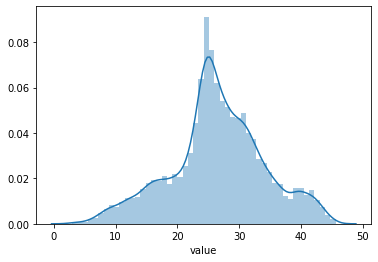

In [ ]:
#sns.distplot(df_iot[df_iot['sensor'] == 'HUM']['value'])
def distribution_plot(df):
  sensor = input("input sensor type(HUM,PRES,TC)")
  sns.distplot(df[df["sensor"] == sensor]['value'])
distribution_plot(df_iot)
# relative humidity looks very non-gaussian; even box-cox or power distribution wont work, can go for shapiro-wilk if nothing works
# Pressure is a biomodal distribution with both modes having almost the same frequency + a longer right tail
# As expected temp is more gaussian than others

input sensor type(HUM,PRES,TC)TC


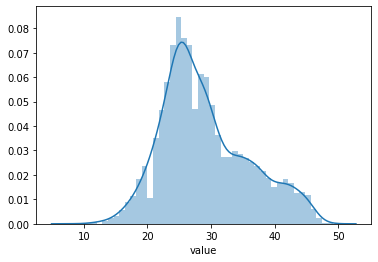

In [ ]:
distribution_plot(df_source1)
# the distributions of relative humidity of source 1 (bimodal) and iot data (right skewed) is very very different.
# as mentioned in conjecture above, the pressure distributions (although both bimodal) are way off.(something doesn't look right with the values or units)
# only temperature distributions look similar

# on comparing the descriptive statistics and distribution frequencies ---> Since there is a huge difference I won't
# be using source1 and source2 (non-localised data) for hyper-local iot predictions


#def dates_recorded(df):
 # return df["datetime"].split(" ")[0].value_counts()

sensor type (HUM,PRES,TC)TC


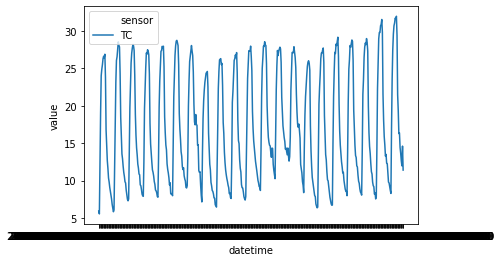

In [ ]:
# QUESTION 2 ---> Intra day patterns are clearly visible when plotting sensor data against datetime
# These intra day patterns will also change against yearly seasons (mainly summer, monsoon and winter)
# TODO : for yearly change--> hierarchial clustering lets say K means clusterring with k = 3 (seasons)
# TODO: if k means does gives a convoluted result then go for other clustering techniques like TSNE --> sklearn.manifold.TSNE
# clustering/ grouping of data might only work for a particular time of day for the 3 seasons
# TODO : according to time, add a time of day column (early morning, afternoon, evening, night ) or simply a 6 periods of 4 hours each across each day
# using each such column for whole year clustering is a better approach. Since different times of the day will add to the noise 
def timeseries_plot(df):
  sensor = input("sensor type (HUM,PRES,TC)")
  sns.lineplot(x="datetime", y="value",
             hue="sensor",
             data=df[df["sensor"]==sensor][:500])
timeseries_plot(df_iot)
# for brevity I am only plotting first 500 entries ~ 21 days data

In [ ]:
# standardizing the data for each sensor separately and appending into a new dataframe
# rule of thumb is to standardize data before plotting a scatter or a regplot.
def standardize_Data(df):
  HUM_data = df[df["sensor"]=="HUM"]
  PRES_data = df[df["sensor"]=="PRES"]
  TC_data = df[df["sensor"]=="TC"]
  HUM_data['value'] = preprocessing.scale(HUM_data['value'])
  PRES_data['value'] = preprocessing.scale(PRES_data['value'])
  TC_data['value'] = preprocessing.scale(TC_data['value'])
  frames = [HUM_data,PRES_data,TC_data]
  df_iot_std = pd.concat(frames)

  return df_iot_std

df_iot_std = standardize_Data(df_iot)
#df[['cost', 'sales']] = StandardScaler().fit_transform(df[['cost', 'sales']])
#df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: overflow encountered in true_divide
  endog_mu = self._clean(endog / mu)


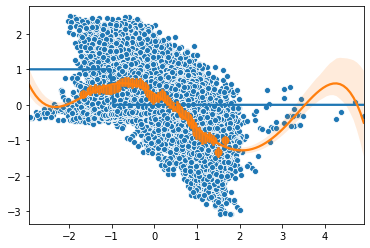

In [ ]:
#QUESTION 3 (trends in humidity, temperature and pressure) 
# the scatter plots and the reg plots show patterns of sensors with each other taken 2 at a time
#def standardize_plot_scatter(df):
df = df_iot_std
HUM = df[df["sensor"]=="HUM"]['value'].to_numpy()
PRES = df[df["sensor"]=="PRES"]['value'].to_numpy()
TC = df[df["sensor"]=="TC"]['value'].to_numpy()

# tried for all combinations of sensors
ax=sns.scatterplot(x = PRES, y = TC)
# can see a that the relationship is not linear, lets try visually to fit differnt functions through the data
# plotting a regression plot with a line of best fit or a ploynomial or a logistic graph or log function.
ax2 = sns.regplot(x=PRES, y=TC,logistic=True, x_bins = 40)
ax3 = sns.regplot(x=PRES, y=TC,order = 5, x_bins = 40)
# remove the logistic = TRUe for a line of best fit
# The data is being fit with a logistic curve (can also try logx = TRUE to fit with log | or order = 2 for polynomial x^2)
# as expected humidity, pressure and temperature do not foloow any particular linear realtionships with each other 
# Ideal gas equation -- > pressure is directly praportional to temperature.
# some preliminary google searches showed that temparature is inversely praportional to realtive humidity

In [ ]:
# QUESTION 1 (correaltion of sensor data)
# as noted ealrier the sensor data is non-gaussian and follow non linear relationship, so We'll have to go for 
# non parametric statistical tests 
# therefore correaltion ---> spearman
from scipy.stats import spearmanr

corr1, _ = spearmanr(HUM, PRES)
corr2,_ = spearmanr(PRES,TC)
corr3,_ = spearmanr(TC, HUM)
print('Spearmans correlations HUM vs PRES, PRES vs TC and TC vs HUM are:')
print(corr1,corr2,corr3)
#print(len(HUM),len(PRES),len(TC))
# As expected relatively strong  negative correaltion between temperature and humidity 
# weak negative correlation between pressure and temperature 
# almost zero correaltion between humidity and pressure 

Spearmans correlations HUM vs PRES, PRES vs TC and TC vs HUM are:
0.09802906702559665 -0.49604879790265466 -0.7165730007068846


In [ ]:
# univariate time series with ARIMA
from statsmodels.tsa.arima_model import ARIMA
# training for first 8200 rows
# rest is test data
#train_data_hum = df_iot[df_iot["sensor"]=="HUM"][0:8201]
#test_data_hum = df_iot[df_iot["sensor"]=="HUM"][-122:8322:1]
hum_data = df_iot[df_iot["sensor"]=="HUM"]['value'].to_numpy()

# fitting the model
model = ARIMA(hum_data, order=(1,1,0)) # trial and error of the parameters
model_fit = model.fit(disp=0)
print(model_fit.summary())
# this describes the trained model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 8321
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -31161.453
Method:                       css-mle   S.D. of innovations             10.237
Date:                Mon, 17 Aug 2020   AIC                          62328.906
Time:                        18:01:16   BIC                          62349.985
Sample:                             1   HQIC                         62336.107
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.943e-16      0.166  -1.17e-15      1.000      -0.326       0.326
ar.L1.D.y      0.3253      0.010     31.386      0.000       0.305       0.346
                                    Roots           

Text(0, 0.5, ' Model prediction Minus ground truth')

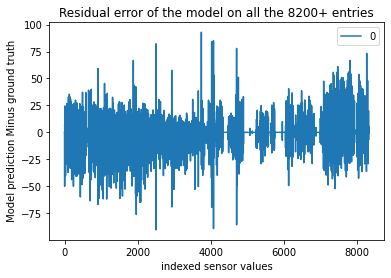

In [ ]:
# in sample error
# plot residual errors -- ground truth minus the predicted values
residuals = pd.DataFrame(model_fit.resid)
x=residuals.plot()
plt.title("Residual error of the model on all the 8200+ entries")
plt.xlabel("indexed sensor values")
plt.ylabel(" Model prediction Minus ground truth")
# TODO: traing the model using differnt parameters
# TODO: Also try out sample testing.Although the results will be very poor after seeing the in sample performance
# ie. the model is not robust enough to learn the data

In [ ]:
# from the above graph it can be seen that the predictions  are way off
# This might be due to the fact that ARIMA is univariate and does not 
# account for changes in other sensor data over time

#Leanring:
# Since the recorded sensor data is ever increasing; Deep neural networks are a better approach
# than traditional machine learning algorithms. They will over improve over time as data increases and not stagnate
# A Recurrent Neural Netowrk or a Long short term Memory RNN can be trained for the same.

# QUESTION 5 deploying
#Steps involved:
#1) Training machine learning model locally, this model is trained on data queried from cloud data dumps/ETL.
#2) Wrapping the data into a Flask/Django application.
#3) Using Docker to containerize the API.
#4) Hosting the Docker container on AWS ec2 instance and consuming the web-service